## 📦 Data Import and Initial Exploration

This cell performs the initial steps of the machine learning pipeline by:

1. **Importing essential libraries**: 
   - `pandas`, `numpy` for data handling.
   - `matplotlib.pyplot` and `seaborn` for visualization.
   - Scikit-learn modules for preprocessing, modeling, and evaluation.

2. **Loading the dataset**:
   - Reads the dataset from the file `dataset_Seminar1.txt` using whitespace as the delimiter and no predefined header.

3. **Assigning column names**:
   - Provides descriptive names with units to each feature based on the dataset specification.
   - This improves readability and makes subsequent analysis more interpretable.

4. **Displaying dataset info**:
   - Prints the shape of the dataset (rows × columns).
   - Shows the first few rows using `df.head()`.
   - Displays summary statistics for all columns using `df.describe()`, including categorical and numerical data.

This step is crucial for understanding the structure and contents of the dataset before performing any preprocessing or modeling.


In [2]:
# ----------------------------------
# 📦 Imports
# ----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------------
# 📂 Load Dataset
# ----------------------------------
file_path = 'dataset_Seminar1.txt'
df = pd.read_csv(file_path, header=None, delim_whitespace=True)

# ----------------------------------
# 🏷️ Assign Column Names with Units
# ----------------------------------
df.columns = [
    "num_stas [units]",         # 1–40
    "load [bps]",               # 0.5–82 Mbps = 500K–82M bps
    "size_x [m]",               # 1–40
    "size_y [m]",               # 1–40
    "area [m²]",                # 1–1600
    "cw [slots]",               # categorical
    "channel_width [MHz]",      # categorical
    "packet_size [bits]",       # categorical
    "max_rssi [dBm]",           # ≥ -82
    "avg_rssi [dBm]",           # ≥ -82
    "min_rssi [dBm]",           # ≥ -82
    "avg_prob_failure [0-1]",   # 0–1
    "throughput [bps]",         # target
    "avg_delay [s]",            # up to ~30s
    "total_airtime [s]",        # ≥ 0
    "prop_airtime [0-1]"        # 0–1
]

print(f"Raw dataset shape: {df.shape}")

display(df.head())

display(df.describe(include="all"))

Raw dataset shape: (100000, 16)


,num_stas [units],load [bps],size_x [m],size_y [m],area [m²],cw [slots],channel_width [MHz],packet_size [bits],max_rssi [dBm],avg_rssi [dBm],min_rssi [dBm],avg_prob_failure [0-1],throughput [bps],avg_delay [s],total_airtime [s],prop_airtime [0-1]
0,40.0,60000000.0,22.0,39.0,858.0,63.0,80.0,4000.0,-42.928330,-63.163012,-74.965338,0.415189,7.208644e+06,1.229466e+07,1.084041,0.875490
1,35.0,52500000.0,20.0,33.0,660.0,31.0,40.0,10000.0,-47.815800,-63.298410,-72.847989,0.485311,1.545116e+07,1.275042e+07,1.111263,0.873785
2,16.0,12000000.0,34.0,14.0,476.0,255.0,40.0,4000.0,-46.138494,-60.076333,-70.044800,0.099413,6.743660e+06,2.251690e+06,0.880036,0.849701
3,37.0,18500000.0,35.0,7.0,245.0,31.0,80.0,10000.0,-42.708813,-60.141393,-72.029643,0.493704,1.675025e+07,1.211374e+07,1.126341,0.860103
4,18.0,4500000.0,36.0,35.0,1260.0,127.0,160.0,8000.0,-45.492991,-63.780783,-76.225550,0.011664,4.500000e+06,1.446000e-03,0.276770,0.275687


,num_stas [units],load [bps],size_x [m],size_y [m],area [m²],cw [slots],channel_width [MHz],packet_size [bits],max_rssi [dBm],avg_rssi [dBm],min_rssi [dBm],avg_prob_failure [0-1],throughput [bps],avg_delay [s],total_airtime [s],prop_airtime [0-1]
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,21.446170,2.140292e+07,20.562940,20.479640,421.270350,227.043920,75.106000,7997.580000,-45.911165,-57.577426,-66.467827,0.226676,9.716009e+06,4.688176e+06,0.780560,0.660724
std,11.554365,1.852042e+07,11.545206,11.540626,360.344349,323.350855,53.704279,2825.532513,5.400265,6.108548,8.057528,0.224848,4.958025e+06,7.875887e+06,0.360426,0.256756
min,2.000000,5.000000e+05,1.000000,1.000000,1.000000,3.000000,20.000000,4000.000000,-81.405165,-81.405165,-84.333834,0.000209,5.000000e+05,4.930000e-04,0.019793,0.019792
25%,11.000000,7.250000e+06,11.000000,11.000000,120.000000,15.000000,20.000000,6000.000000,-48.131476,-61.985000,-72.637078,0.036429,6.187692e+06,2.145750e-03,0.481082,0.473732
50%,21.000000,1.600000e+07,21.000000,20.000000,320.000000,63.000000,80.000000,8000.000000,-44.111064,-58.163205,-67.997587,0.126492,9.113764e+06,2.253349e+06,0.857473,0.781014
75%,31.000000,3.000000e+07,31.000000,30.000000,640.000000,255.000000,160.000000,10000.000000,-41.888821,-53.589525,-61.525848,0.400686,1.343290e+07,8.224326e+06,1.069432,0.866646
max,41.000000,8.200000e+07,40.000000,40.000000,1600.000000,1023.000000,160.000000,12000.000000,-40.863587,-40.865960,-40.865960,0.765422,2.262273e+07,5.330772e+08,1.449354,0.946776


## ✅ Data Validation and Cleaning: Bound Checks

This section performs **comprehensive data validation** by checking whether values fall within expected bounds for each feature.

### 🔍 Key Steps:

1. **Define Valid Ranges**:
   - A dictionary (`bounds`) specifies valid value ranges for all features, including:
     - **Numerical ranges** (e.g., 1–40 for `num_stas`)
     - **Categorical valid sets** (e.g., `[3, 15, ..., 1023]` for `cw [slots]`)

2. **Out-of-Bound Detection**:
   - For each feature:
     - Identifies and counts values **below or above valid bounds** (for numerical).
     - Flags **unexpected values** for categorical features.
   - Visualizes these invalid values using histograms for further insight.

3. **Outlier Summary**:
   - Adds a new column `Out_Bound` to flag rows with any invalid value.
   - Prints total number of affected rows.

4. **Correlation & Summary**:
   - Displays summary statistics after validation.
   - Generates a **correlation heatmap** to explore linear relationships between numerical features.

This validation ensures data integrity before feeding it into machine learning models, helping to identify possible simulation errors or data collection issues.



📊 Out-of-Bounds Value Report + Distribution

🔍 num_stas [units]
✅ No values below lower bound.
🔺 2545 values above upper bound (40)
   ➤ Min value: 41.00
   ➤ Max value: 41.00
🔢 Unique values and counts:


41.0    2545
Name: num_stas [units], dtype: int64

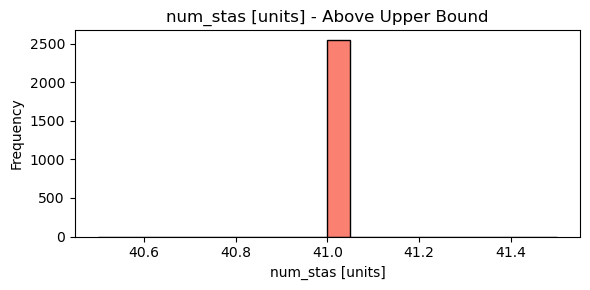


🔍 load [bps]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 size_x [m]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 size_y [m]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 area [m²]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 cw [slots]
❌ Found 11121 invalid categorical values
🔢 Unique invalid values and counts:


7.0    11121
Name: cw [slots], dtype: int64


🔍 channel_width [MHz]
✅ All categorical values are valid.

🔍 packet_size [bits]
✅ All categorical values are valid.

🔍 max_rssi [dBm]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 avg_rssi [dBm]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 min_rssi [dBm]
🔻 186 values below lower bound (-82)
   ➤ Min value: -84.33
   ➤ Max value: -82.00
🔢 Unique values and counts:


-82.225345    1
-82.727485    1
-83.038883    1
-83.386386    1
-82.372093    1
             ..
-82.593620    1
-82.097004    1
-82.799477    1
-82.737355    1
-83.813081    1
Name: min_rssi [dBm], Length: 186, dtype: int64

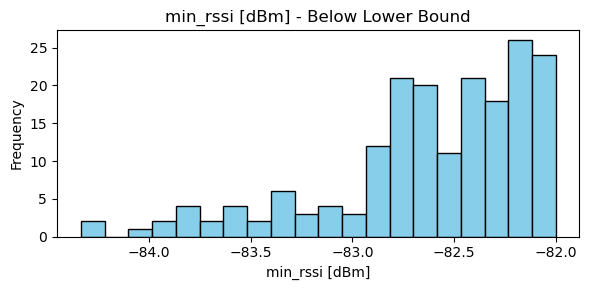

✅ No values above upper bound.

🔍 avg_prob_failure [0-1]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 throughput [bps]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 avg_delay [s]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 total_airtime [s]
✅ No values below lower bound.
✅ No values above upper bound.

🔍 prop_airtime [0-1]
✅ No values below lower bound.
✅ No values above upper bound.

🟨 Total rows with any out-of-bound value: 13529 / 100000

📈 Summary Statistics:


,num_stas [units],load [bps],size_x [m],size_y [m],area [m²],cw [slots],channel_width [MHz],packet_size [bits],max_rssi [dBm],avg_rssi [dBm],min_rssi [dBm],avg_prob_failure [0-1],throughput [bps],avg_delay [s],total_airtime [s],prop_airtime [0-1],Out_Bound
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,21.446170,2.140292e+07,20.562940,20.479640,421.270350,227.043920,75.106000,7997.580000,-45.911165,-57.577426,-66.467827,0.226676,9.716009e+06,4.688176e+06,0.780560,0.660724,0.135290
std,11.554365,1.852042e+07,11.545206,11.540626,360.344349,323.350855,53.704279,2825.532513,5.400265,6.108548,8.057528,0.224848,4.958025e+06,7.875887e+06,0.360426,0.256756,0.342035
min,2.000000,5.000000e+05,1.000000,1.000000,1.000000,3.000000,20.000000,4000.000000,-81.405165,-81.405165,-84.333834,0.000209,5.000000e+05,4.930000e-04,0.019793,0.019792,0.000000
25%,11.000000,7.250000e+06,11.000000,11.000000,120.000000,15.000000,20.000000,6000.000000,-48.131476,-61.985000,-72.637078,0.036429,6.187692e+06,2.145750e-03,0.481082,0.473732,0.000000
50%,21.000000,1.600000e+07,21.000000,20.000000,320.000000,63.000000,80.000000,8000.000000,-44.111064,-58.163205,-67.997587,0.126492,9.113764e+06,2.253349e+06,0.857473,0.781014,0.000000
75%,31.000000,3.000000e+07,31.000000,30.000000,640.000000,255.000000,160.000000,10000.000000,-41.888821,-53.589525,-61.525848,0.400686,1.343290e+07,8.224326e+06,1.069432,0.866646,0.000000
max,41.000000,8.200000e+07,40.000000,40.000000,1600.000000,1023.000000,160.000000,12000.000000,-40.863587,-40.865960,-40.865960,0.765422,2.262273e+07,5.330772e+08,1.449354,0.946776,1.000000


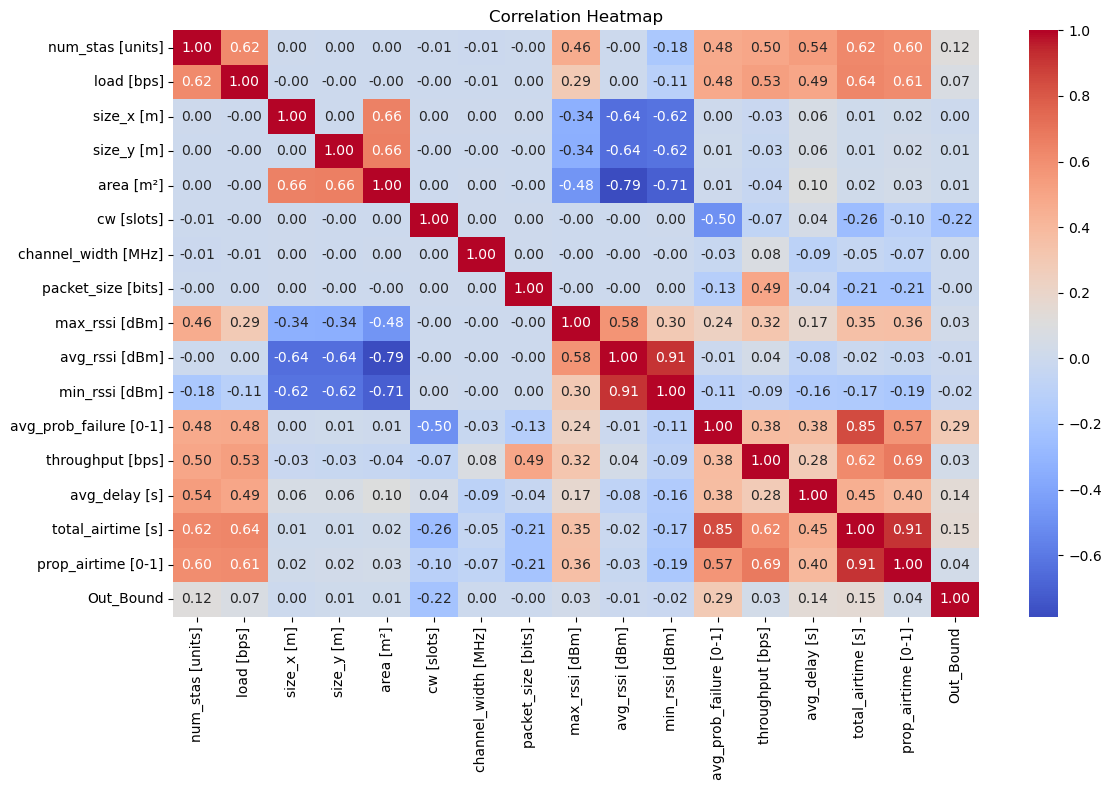

In [3]:
# ----------------------------------
# ✅ Validation: Bounds per Slide & Data
# ----------------------------------
bounds = {
    "num_stas [units]": (1, 40),
    "load [bps]": (500_000, 82_000_000),
    "size_x [m]": (1, 40),
    "size_y [m]": (1, 40),
    "area [m²]": (1, 1600),
    "cw [slots]": [3, 15, 31, 63, 127, 255, 511, 1023],
    "channel_width [MHz]": [20, 40, 80, 160],
    "packet_size [bits]": [4000, 6000, 8000, 10000, 12000],
    "max_rssi [dBm]": (-82, 0),
    "avg_rssi [dBm]": (-82, 0),
    "min_rssi [dBm]": (-82, 0),
    "avg_prob_failure [0-1]": (0, 1),
    "throughput [bps]": (0, np.inf),
    "avg_delay [s]": (0, np.inf),
    "total_airtime [s]": (0, np.inf),
    "prop_airtime [0-1]": (0, 1),
}

import matplotlib.pyplot as plt

# Create boolean mask for any out-of-bound row
out_bound_mask = pd.Series(False, index=df.index)

print("\n📊 Out-of-Bounds Value Report + Distribution")

for col, val_range in bounds.items():
    print(f"\n🔍 {col}")

    if isinstance(val_range, list):  # Categorical column
        invalid_mask = ~df[col].isin(val_range)
        if invalid_mask.any():
            out_bound_mask |= invalid_mask
            invalid_values = df.loc[invalid_mask, col]
            print(f"❌ Found {invalid_mask.sum()} invalid categorical values")
            print("🔢 Unique invalid values and counts:")
            display(invalid_values.value_counts())
        else:
            print("✅ All categorical values are valid.")
        continue  # skip to next column

    # Numerical bounds
    min_val, max_val = val_range
    below_mask = df[col] < min_val
    above_mask = df[col] > max_val

    # Below lower bound
    if below_mask.any():
        out_bound_mask |= below_mask
        below_values = df.loc[below_mask, col]
        print(f"🔻 {len(below_values)} values below lower bound ({min_val})")
        print(f"   ➤ Min value: {below_values.min():.2f}")
        print(f"   ➤ Max value: {below_values.max():.2f}")
        print("🔢 Unique values and counts:")
        display(below_values.value_counts())
        plt.figure(figsize=(6, 3))
        plt.hist(below_values, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"{col} - Below Lower Bound")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
    else:
        print("✅ No values below lower bound.")

    # Above upper bound
    if above_mask.any():
        out_bound_mask |= above_mask
        above_values = df.loc[above_mask, col]
        print(f"🔺 {len(above_values)} values above upper bound ({max_val})")
        print(f"   ➤ Min value: {above_values.min():.2f}")
        print(f"   ➤ Max value: {above_values.max():.2f}")
        print("🔢 Unique values and counts:")
        display(above_values.value_counts())
        plt.figure(figsize=(6, 3))
        plt.hist(above_values, bins=20, color='salmon', edgecolor='black')
        plt.title(f"{col} - Above Upper Bound")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
    else:
        print("✅ No values above upper bound.")

# Add final Out_Bound column
df["Out_Bound"] = out_bound_mask.astype(int)

# Summary
print(f"\n🟨 Total rows with any out-of-bound value: {df['Out_Bound'].sum()} / {len(df)}")

# ----------------------------------
# 📊 Statistics and Visualization
# ----------------------------------
print("\n📈 Summary Statistics:")
display(df.describe())

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 🧹 Outlier Removal and Distribution Visualization

This section focuses on **cleaning the dataset** and analyzing the **distribution of numerical features**.

### 🔍 Step-by-step:

1. **Filter Valid Rows Only**:
   - A new dataset `df_iqr` is created by excluding rows flagged as out-of-bound (`Out_Bound == 0`).
   - This forms the basis for cleaner, more reliable analysis.

2. **Select Numerical Features**:
   - Identifies all continuous (non-categorical) features to check for outliers and understand their distribution.

3. **Visualize Distributions**:
   - For each numeric feature:
     - **Left Plot**: Histogram from `df_iqr` (cleaned) shows the feature's distribution without extreme values.
     - **Right Plot**: Boxplot from the original dataset shows potential outliers (values outside the interquartile range).
   - Arranged in a vertical grid for quick visual comparison between the cleaned and raw distributions.

This process helps confirm that data filtering is effective and highlights any remaining skewness or variability in the dataset.



📊 Plotting histograms from df_iqr and boxplots from original df...


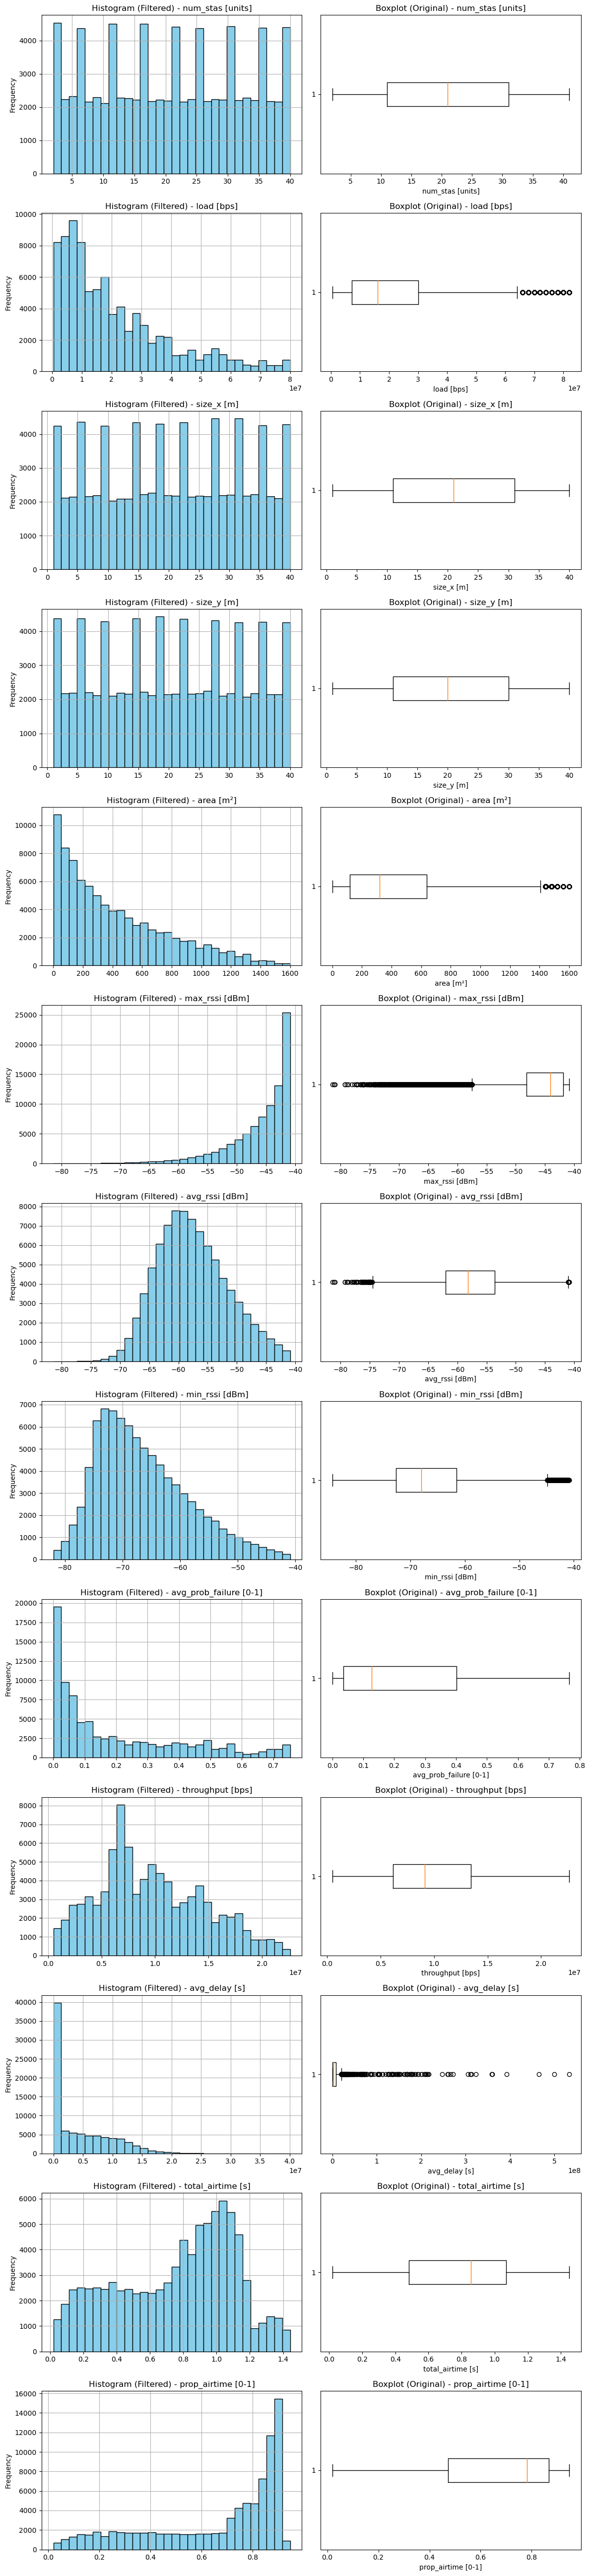

In [4]:
# ----------------------------------
# 🧹 Step 1: Filter only rows within defined bounds
# ----------------------------------
df_iqr = df[df["Out_Bound"] == 0].copy()

# ----------------------------------
# 📦 Step 2: Define numeric (non-categorical) features to check for outliers
# ----------------------------------
numeric_cols = [
    "num_stas [units]",
    "load [bps]",
    "size_x [m]",
    "size_y [m]",
    "area [m²]",
    "max_rssi [dBm]",
    "avg_rssi [dBm]",
    "min_rssi [dBm]",
    "avg_prob_failure [0-1]",
    "throughput [bps]",
    "avg_delay [s]",
    "total_airtime [s]",
    "prop_airtime [0-1]"
]


print("\n📊 Plotting histograms from df_iqr and boxplots from original df...")

n_features = len(numeric_cols)
plt.figure(figsize=(12, 4 * n_features))

for i, col in enumerate(numeric_cols):
    # Histogram from df_iqr (cleaned)
    plt.subplot(n_features, 2, 2 * i + 1)
    df_iqr[col].hist(bins=30, edgecolor='black', color='skyblue')
    plt.title(f"Histogram (Filtered) - {col}")
    plt.xlabel("")
    plt.ylabel("Frequency")

    # Boxplot from original df
    plt.subplot(n_features, 2, 2 * i + 2)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot (Original) - {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()




## 📉 Advanced Outlier Filtering Using Asymmetric IQR

This section refines the dataset by removing statistical outliers using a **skew-aware interquartile range (IQR) method**, improving robustness for skewed distributions.

### 🧪 Key Steps:

1. **Start from Original Data**:
   - A copy of the original dataset (`df_outlier_filtered`) is used to retain flexibility.

2. **Initialize a Global IQR Mask**:
   - All rows are initially considered valid (`True`).
   - As each feature is processed, rows that fall outside skew-adjusted IQR bounds are marked invalid.

3. **Feature-wise Filtering with Skew Adjustment**:
   - For each numeric column:
     - Calculates skewness to assess asymmetry.
     - Applies **asymmetric IQR thresholds**:
       - Right-skewed: tighter lower bound, looser upper bound.
       - Left-skewed: looser lower bound, tighter upper bound.
       - Symmetric: standard IQR (1.5× for both bounds).
     - Updates the mask to exclude rows with outlier values in any feature.
   - Also logs how many rows are removed per feature.

4. **Visual Analysis**:
   - Histograms of each feature are plotted **before filtering** to visualize their distributions and skewness.
   - Titles indicate skewness and applied IQR factors.

5. **Apply Combined Filter**:
   - The final dataset (`df_clean`) keeps only rows that:
     - Passed IQR filtering **and**
     - Were already within the expected value bounds (`Out_Bound == 0`).

6. **Summary**:
   - Reports the total number of rows before and after filtering.
   - Highlights how many entries were removed in total.

This asymmetric approach handles skewed data more intelligently than standard IQR filtering, preserving more valid samples while still removing extreme outliers.



📊 Plotting histograms and applying asymmetric IQR filtering based on skewness...
 - num_stas [units]: Skewness = 0.01, IQR factors = (lower: 1.5, upper: 1.5), Removed = 0
 - load [bps]: Skewness = 1.24, IQR factors = (lower: 1.5, upper: 1.5), Removed = 3749
 - size_x [m]: Skewness = -0.01, IQR factors = (lower: 1.5, upper: 1.5), Removed = 0
 - size_y [m]: Skewness = 0.00, IQR factors = (lower: 1.5, upper: 1.5), Removed = 0
 - area [m²]: Skewness = 0.95, IQR factors = (lower: 1.5, upper: 1.5), Removed = 975
 - max_rssi [dBm]: Skewness = -1.75, IQR factors = (lower: 3.0, upper: 1.5), Removed = 686
 - avg_rssi [dBm]: Skewness = 0.33, IQR factors = (lower: 1.5, upper: 1.5), Removed = 78
 - min_rssi [dBm]: Skewness = 0.72, IQR factors = (lower: 1.5, upper: 1.5), Removed = 1174
 - avg_prob_failure [0-1]: Skewness = 0.82, IQR factors = (lower: 1.5, upper: 1.5), Removed = 0
 - throughput [bps]: Skewness = 0.36, IQR factors = (lower: 1.5, upper: 1.5), Removed = 0
 - avg_delay [s]: Skewness = 1

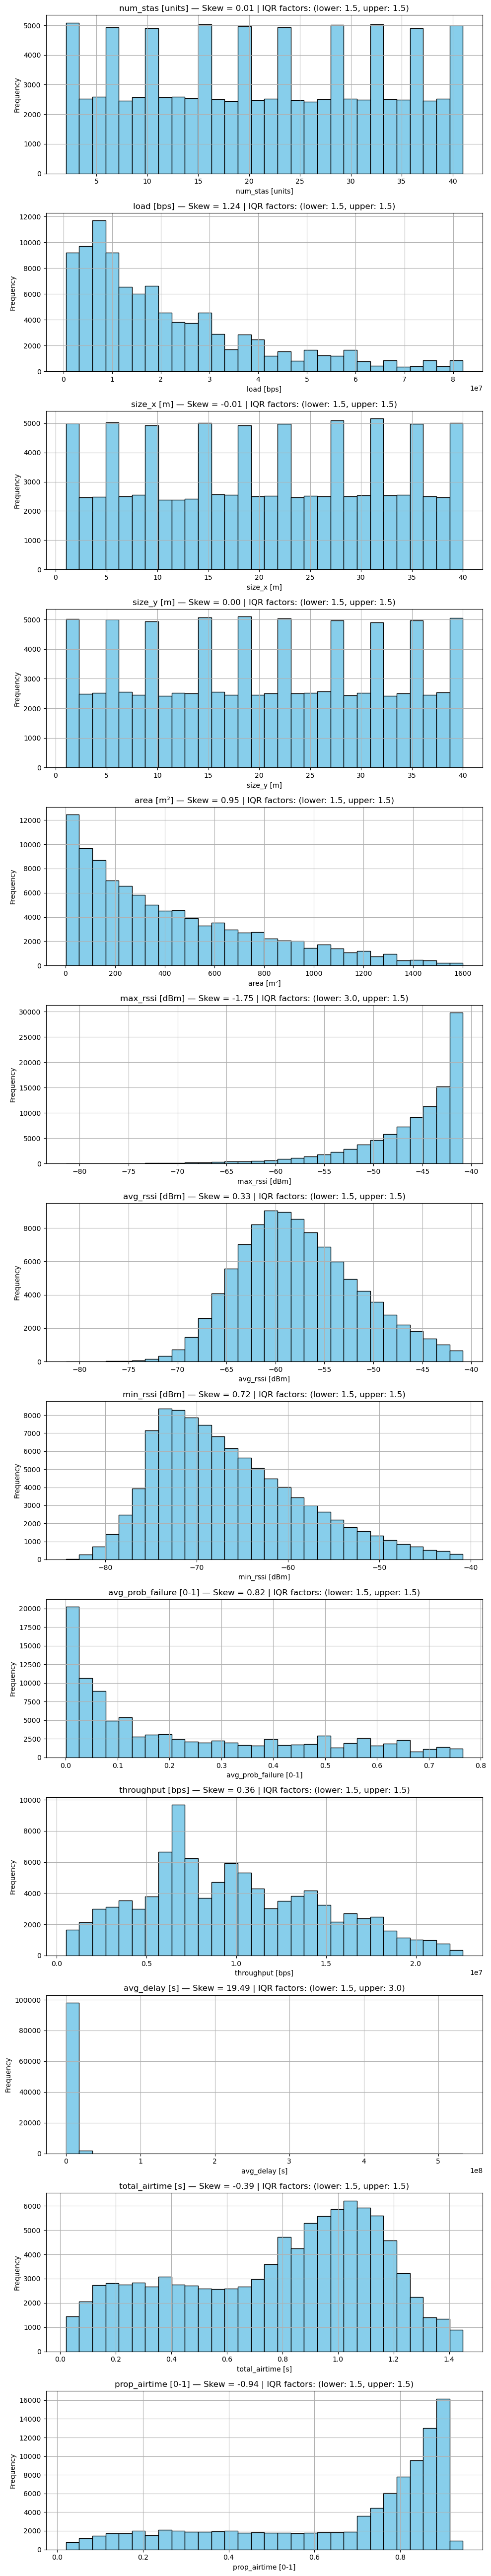


📦 Original rows: 100000
✅ Rows after IQR + Out_Bound filtering: 81228
🧾 Total removed: 18772


In [5]:
import matplotlib.pyplot as plt
from scipy.stats import skew

# Step 1: Start from the original dataset
df_outlier_filtered = df.copy()

# Step 2: Initialize IQR mask (all True at first)
iqr_mask = pd.Series(True, index=df_outlier_filtered.index)

print("\n📊 Plotting histograms and applying asymmetric IQR filtering based on skewness...")

n_features = len(numeric_cols)
plt.figure(figsize=(10, 4 * n_features))

for i, col in enumerate(numeric_cols):
    data = df_outlier_filtered[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    skewness = skew(data)

    # Asymmetric IQR bounds based on skewness
    if skewness >= 1.5:
        lower_factor = 1.5
        upper_factor = 3.0
    elif skewness <= -1.5:
        lower_factor = 3.0
        upper_factor = 1.5
    else:
        lower_factor = 1.5
        upper_factor = 1.5

    lower_bound = Q1 - lower_factor * IQR
    upper_bound = Q3 + upper_factor * IQR

    # Column-wise mask for outliers
    col_mask = (df_outlier_filtered[col] >= lower_bound) & (df_outlier_filtered[col] <= upper_bound)
    iqr_mask &= col_mask
    removed = (~col_mask).sum()

    print(f" - {col}: Skewness = {skewness:.2f}, IQR factors = (lower: {lower_factor}, upper: {upper_factor}), Removed = {removed}")

    # Plot histogram only (before filtering)
    plt.subplot(n_features, 1, i + 1)
    data.hist(bins=30, edgecolor='black', color='skyblue')
    plt.title(f"{col} — Skew = {skewness:.2f} | IQR factors: (lower: {lower_factor}, upper: {upper_factor})")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Step 3: Combine IQR mask with Out_Bound = 0
combined_mask = iqr_mask & (df_outlier_filtered["Out_Bound"] == 0)
df_clean = df_outlier_filtered[combined_mask].copy()

# Step 4: Summary
print(f"\n📦 Original rows: {len(df)}")
print(f"✅ Rows after IQR + Out_Bound filtering: {len(df_clean)}")
print(f"🧾 Total removed: {len(df) - len(df_clean)}")


## 🗑️ Capturing Removed Outlier Rows

This short step creates a new DataFrame, `df_removed`, that stores all the rows removed during the outlier filtering process.

### 🔍 What It Does:

- **Inverse of the final mask** (`~combined_mask`) is used to select rows that:
  - Were flagged as out-of-bounds, **or**
  - Were considered outliers based on the asymmetric IQR filtering.
- These removed rows are stored for:
  - Further inspection or debugging.
  - Possible future re-integration, if needed.

A quick summary is printed to report how many rows were excluded and saved in `df_removed`.


In [6]:
# Create a DataFrame of the removed rows
df_removed = df_outlier_filtered[~combined_mask].copy()

print(f"\n🗑️ Removed rows stored in df_removed: {len(df_removed)} rows")



🗑️ Removed rows stored in df_removed: 18772 rows


## 🤖 Model Training, Evaluation, and Comparison Pipeline

This section implements the full machine learning pipeline: **preprocessing, model training, cross-validation, and evaluation** across multiple dataset variants and model types.

---

### 📦 Dataset Variants:
Three filtered versions of the dataset are tested:
- **All Data**: The complete dataset.
- **In-Bound Only**: Rows within expected value bounds.
- **IQR Filtered**: Rows after IQR-based outlier filtering.

---

### ⚙️ Models Evaluated:
Includes baseline and regularized linear regression models:
- **LinearRegression**
- **Ridge Regression** with three `alpha` values
- **ElasticNet** with varying combinations of `alpha` and `l1_ratio`

---

### 🔁 Core Loop Functionality:
For each dataset and model:
1. **Data Split**: 85% training/validation, 15% testing.
2. **Preprocessing**: 
   - Standardizes numeric features.
   - One-hot encodes categorical variables.
3. **Optional PCA**: Reduces dimensionality using 95% explained variance.
4. **Model Pipeline**: Constructs a scikit-learn pipeline combining preprocessing, optional PCA, and the model.
5. **Cross-Validation**:
   - Performs 10-fold CV on the training set using R² as the metric.
6. **Final Training & Evaluation**:
   - Fits the model on the full training set and evaluates it on the holdout test set.
   - Reports R², MAE, and runtime.
7. **Storage**:
   - Results are saved for each run.
   - Tree-based models (if used) are stored separately for SHAP/feature importance analysis.

---

### 📊 Results Summary:
- Builds a DataFrame of all model results sorted by test R².
- Displays a summary table of:
  - Dataset + Model Label
  - Cross-validated R²
  - Test R² and MAE
  - Runtime in seconds

---

### 📈 Visualization:
- For the **top 5 best-performing models**, plots:
  - **Actual vs. Predicted** test throughput.
  - Diagonal reference line for perfect prediction.

This section automates comprehensive model comparison and prepares results for downstream explainability or optimization.



🚀 Starting full pipeline...

📂 Dataset: All Data (100000 samples)


,num_stas [units],load [bps],size_x [m],size_y [m],area [m²],max_rssi [dBm],avg_rssi [dBm],min_rssi [dBm],avg_prob_failure [0-1],avg_delay [s],total_airtime [s],prop_airtime [0-1],cw [slots],channel_width [MHz],packet_size [bits]
0,40.0,60000000.0,22.0,39.0,858.0,-42.928330,-63.163012,-74.965338,0.415189,1.229466e+07,1.084041,0.875490,63.0,80.0,4000.0
1,35.0,52500000.0,20.0,33.0,660.0,-47.815800,-63.298410,-72.847989,0.485311,1.275042e+07,1.111263,0.873785,31.0,40.0,10000.0
2,16.0,12000000.0,34.0,14.0,476.0,-46.138494,-60.076333,-70.044800,0.099413,2.251690e+06,0.880036,0.849701,255.0,40.0,4000.0
3,37.0,18500000.0,35.0,7.0,245.0,-42.708813,-60.141393,-72.029643,0.493704,1.211374e+07,1.126341,0.860103,31.0,80.0,10000.0
4,18.0,4500000.0,36.0,35.0,1260.0,-45.492991,-63.780783,-76.225550,0.011664,1.446000e-03,0.276770,0.275687,127.0,160.0,8000.0


0    7.208644e+06
1    1.545116e+07
2    6.743660e+06
3    1.675025e+07
4    4.500000e+06
Name: throughput [bps], dtype: float64


🔧 Running: All Data | No PCA | Linear
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9312
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9307, MAE: 956275.83, Runtime: 2.93s

🔧 Running: All Data | No PCA | Ridge α=0.1
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9312
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9307, MAE: 955895.10, Runtime: 0.63s

🔧 Running: All Data | No PCA | Ridge α=1.0
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9312
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9307, MAE: 955918.84, Runtime: 0.51s

🔧 Running: All Data | No PCA | Ridge α=10.0
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9312
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9307, MAE: 956157.82, Runtime: 0.54s

🔧 Running: All Data | No PCA | ElasticNet α=0.1, l1=0.1
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.8725
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.8739, MAE: 1360548.89, 

,num_stas [units],load [bps],size_x [m],size_y [m],area [m²],max_rssi [dBm],avg_rssi [dBm],min_rssi [dBm],avg_prob_failure [0-1],avg_delay [s],total_airtime [s],prop_airtime [0-1],cw [slots],channel_width [MHz],packet_size [bits]
0,40.0,60000000.0,22.0,39.0,858.0,-42.928330,-63.163012,-74.965338,0.415189,1.229466e+07,1.084041,0.875490,63.0,80.0,4000.0
1,35.0,52500000.0,20.0,33.0,660.0,-47.815800,-63.298410,-72.847989,0.485311,1.275042e+07,1.111263,0.873785,31.0,40.0,10000.0
2,16.0,12000000.0,34.0,14.0,476.0,-46.138494,-60.076333,-70.044800,0.099413,2.251690e+06,0.880036,0.849701,255.0,40.0,4000.0
3,37.0,18500000.0,35.0,7.0,245.0,-42.708813,-60.141393,-72.029643,0.493704,1.211374e+07,1.126341,0.860103,31.0,80.0,10000.0
4,18.0,4500000.0,36.0,35.0,1260.0,-45.492991,-63.780783,-76.225550,0.011664,1.446000e-03,0.276770,0.275687,127.0,160.0,8000.0


0    7.208644e+06
1    1.545116e+07
2    6.743660e+06
3    1.675025e+07
4    4.500000e+06
Name: throughput [bps], dtype: float64


🔧 Running: In-Bound Only | No PCA | Linear
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 963307.07, Runtime: 2.46s

🔧 Running: In-Bound Only | No PCA | Ridge α=0.1
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 961908.21, Runtime: 0.68s

🔧 Running: In-Bound Only | No PCA | Ridge α=1.0
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 961939.70, Runtime: 0.52s

🔧 Running: In-Bound Only | No PCA | Ridge α=10.0
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 962257.85, Runtime: 0.50s

🔧 Running: In-Bound Only | No PCA | ElasticNet α=0.1, l1=0.1
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.8734
🏗 Fitting model and evaluating on test set...
📊 Test R²: 

,num_stas [units],load [bps],size_x [m],size_y [m],area [m²],max_rssi [dBm],avg_rssi [dBm],min_rssi [dBm],avg_prob_failure [0-1],avg_delay [s],total_airtime [s],prop_airtime [0-1],cw [slots],channel_width [MHz],packet_size [bits]
0,40.0,60000000.0,22.0,39.0,858.0,-42.928330,-63.163012,-74.965338,0.415189,1.229466e+07,1.084041,0.875490,63.0,80.0,4000.0
1,35.0,52500000.0,20.0,33.0,660.0,-47.815800,-63.298410,-72.847989,0.485311,1.275042e+07,1.111263,0.873785,31.0,40.0,10000.0
2,16.0,12000000.0,34.0,14.0,476.0,-46.138494,-60.076333,-70.044800,0.099413,2.251690e+06,0.880036,0.849701,255.0,40.0,4000.0
3,37.0,18500000.0,35.0,7.0,245.0,-42.708813,-60.141393,-72.029643,0.493704,1.211374e+07,1.126341,0.860103,31.0,80.0,10000.0
4,18.0,4500000.0,36.0,35.0,1260.0,-45.492991,-63.780783,-76.225550,0.011664,1.446000e-03,0.276770,0.275687,127.0,160.0,8000.0


0    7.208644e+06
1    1.545116e+07
2    6.743660e+06
3    1.675025e+07
4    4.500000e+06
Name: throughput [bps], dtype: float64


🔧 Running: IQR Filtered | No PCA | Linear
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 963307.07, Runtime: 2.27s

🔧 Running: IQR Filtered | No PCA | Ridge α=0.1
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 961908.21, Runtime: 0.69s

🔧 Running: IQR Filtered | No PCA | Ridge α=1.0
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 961939.70, Runtime: 0.61s

🔧 Running: IQR Filtered | No PCA | Ridge α=10.0
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.9305
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.9306, MAE: 962257.85, Runtime: 0.62s

🔧 Running: IQR Filtered | No PCA | ElasticNet α=0.1, l1=0.1
⏱ Starting cross-validation...
✅ Cross-validation R²: 0.8734
🏗 Fitting model and evaluating on test set...
📊 Test R²: 0.874

,Label,CV R2,Test MAE,Test R2,Time (s)
3,All Data | No PCA | Ridge α=10.0,0.931217,9.561578e+05,0.930739,0.544053
0,All Data | No PCA | Linear,0.931201,9.562758e+05,0.930736,2.926508
2,All Data | No PCA | Ridge α=1.0,0.931217,9.559188e+05,0.930736,0.512817
1,All Data | No PCA | Ridge α=0.1,0.931217,9.558951e+05,0.930736,0.627361
38,In-Bound Only | No PCA | Linear,0.930469,9.633071e+05,0.930643,2.462030
...,...,...,...,...,...
90,"IQR Filtered | No PCA | ElasticNet α=0.5, l1=0.1",0.673720,2.256515e+06,0.675079,4.148408
109,"IQR Filtered | PCA | ElasticNet α=0.5, l1=0.1",0.672225,2.263388e+06,0.673521,3.906348
71,"In-Bound Only | PCA | ElasticNet α=0.5, l1=0.1",0.672225,2.263388e+06,0.673521,4.159560
14,"All Data | No PCA | ElasticNet α=0.5, l1=0.1",0.668036,2.260800e+06,0.671071,6.319780



📈 Plotting top 5 predicted vs actual:


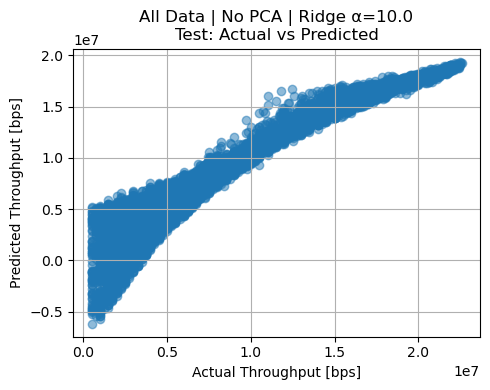

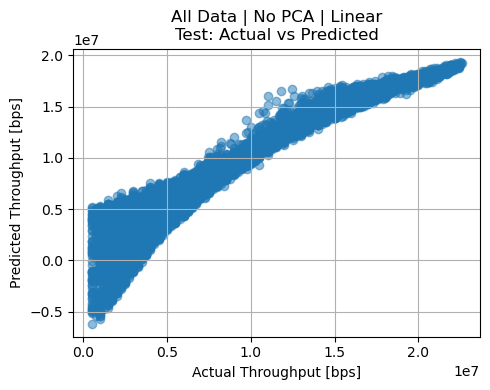

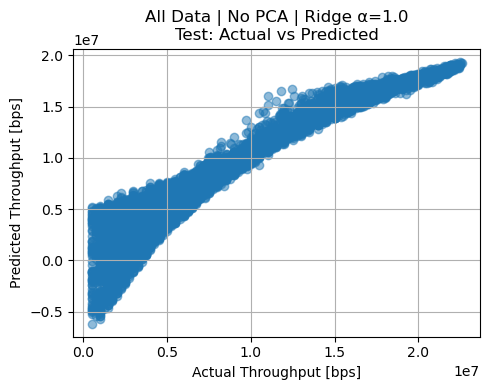

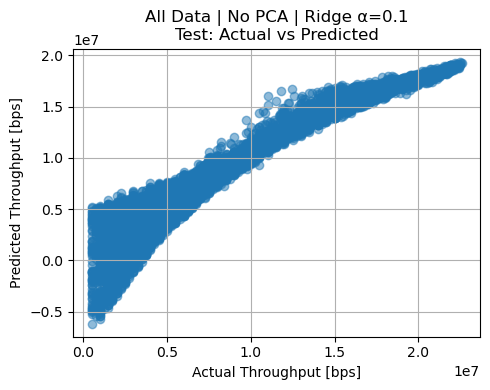

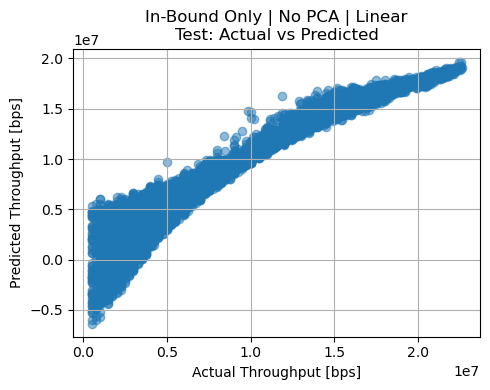


🌲 Plotting feature importances for tree models:

🔍 Running SHAP analysis for tree models (no PCA):


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor

# ------------------------------------------------
# 📦 Datasets
# ------------------------------------------------
data_variants = {
    "All Data": df.copy(),
    "In-Bound Only": df[df["Out_Bound"] == 0].copy(),
    "IQR Filtered": df_iqr.copy()
}

# ------------------------------------------------
# ⚙️ Models
# ------------------------------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor

models = {
    # Baseline
    "Linear": LinearRegression(),

    # Ridge
    "Ridge α=0.1": Ridge(alpha=0.1),
    "Ridge α=1.0": Ridge(alpha=1.0),
    "Ridge α=10.0": Ridge(alpha=10.0),
}

# Add ElasticNet models
for alpha in [0.1, 0.25, 0.5]:
    for l1 in [0.1, 0.25, 0.5, 0.75, 0.9]:
        name = f"ElasticNet α={alpha}, l1={l1}"
        models[name] = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)


# ------------------------------------------------
# 🧪 Storage
# ------------------------------------------------
results = []
best_feature_models = {}

# ------------------------------------------------
# 🔁 Full Pipeline
# ------------------------------------------------
print("🚀 Starting full pipeline...")

for dataset_name, data in data_variants.items():
    print(f"\n📂 Dataset: {dataset_name} ({len(data)} samples)")

    target = "throughput [bps]"
    categorical = ["cw [slots]", "channel_width [MHz]", "packet_size [bits]"]
    numeric = [col for col in data.columns if col not in categorical + [target, "Out_Bound"]]

    X = data[numeric + categorical]
    y = data[target]
    
    display(X.head())
    display(y.head())

    # Split for final test holdout
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Base preprocessing
    base_preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ])

    for use_pca in [False, True]:
        pca_label = "PCA" if use_pca else "No PCA"
        for model_name, model in models.items():
            label = f"{dataset_name} | {pca_label} | {model_name}"
            print(f"\n🔧 Running: {label}")

            # Build pipeline
            steps = [("preprocessor", base_preprocessor)]
            if use_pca:
                steps.append(("pca", PCA(n_components=0.95)))
            steps.append(("regressor", model))
            pipe = Pipeline(steps=steps)

            # Time it
            start_time = time.time()
            print("⏱ Starting cross-validation...")

            # Cross-validation scores (on training set)
            scores = cross_val_score(pipe, X_trainval, y_trainval, scoring='r2', cv=10)
            cv_r2_mean = scores.mean()
            print(f"✅ Cross-validation R²: {cv_r2_mean:.4f}")

            # Fit full train+val and evaluate on test
            print("🏗 Fitting model and evaluating on test set...")
            pipe.fit(X_trainval, y_trainval)
            y_test_pred = pipe.predict(X_test)

            # Metrics
            test_mae = mean_absolute_error(y_test, y_test_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            test_r2 = r2_score(y_test, y_test_pred)
            runtime = time.time() - start_time

            print(f"📊 Test R²: {test_r2:.4f}, MAE: {test_mae:.2f}, Runtime: {runtime:.2f}s")

            # Store model for feature importance if tree-based and no PCA
            if model_name in ["RandomForest", "XGBoost"] and not use_pca:
                best_feature_models[label] = {
                    "model": model,
                    "preprocessor": base_preprocessor,
                    "features": numeric + list(base_preprocessor.transformers_[1][1].get_feature_names_out(categorical))
                }

            results.append({
                "Label": label,
                "CV R2": cv_r2_mean,
                "Test MAE": test_mae,
                "Test MSE": test_mse,
                "Test R2": test_r2,
                "Time (s)": runtime,
                "Y_test": y_test,
                "Y_test_pred": y_test_pred
            })

# ------------------------------------------------
# 📊 Results Table
# ------------------------------------------------
results_df = pd.DataFrame(results).sort_values(by="Test R2", ascending=False)
display(results_df[["Label", "CV R2", "Test MAE", "Test R2", "Time (s)"]])

# ------------------------------------------------
# 📈 Plot Top 5 Actual vs Predicted
# ------------------------------------------------
top_n = 5
print(f"\n📈 Plotting top {top_n} predicted vs actual:")
for i in range(top_n):
    label = results_df.iloc[i]["Label"]
    y_true = results_df.iloc[i]["Y_test"]
    y_pred = results_df.iloc[i]["Y_test_pred"]

    plt.figure(figsize=(5, 4))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.title(f"{label}\nTest: Actual vs Predicted")
    plt.xlabel("Actual Throughput [bps]")
    plt.ylabel("Predicted Throughput [bps]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## 🏆 Best Model Selection and Performance Analysis

This section identifies and analyzes the **top-performing model** based on the highest test R² score, and visualizes its predictive performance.

---

### 🥇 Best Model Metrics:
- Selects the model with the best performance on the test set.
- Displays:
  - **Model label** (dataset + pipeline configuration)
  - **Cross-validated R²**
  - **Test R²**
  - **Test MAE (Mean Absolute Error)**
  - **Runtime** in seconds

---

### 📉 Visual Performance Summary:
Two side-by-side plots provide insight into the model’s test set behavior:

1. **Histogram of Absolute Errors**:
   - Visualizes the distribution of prediction errors on the test set.
   - Helps assess error spread and detect large deviations.

2. **Actual vs. Predicted Scatter Plot**:
   - Plots predicted throughput against actual throughput.
   - Includes a diagonal reference line to represent perfect predictions.
   - Useful for visually assessing prediction accuracy and bias.

---

### 📊 Final Evaluation:
Prints a numerical summary of all key metrics for the best model, aiding interpretation and reporting.

This section confirms model validity through both numerical and visual evidence.




🏆 Best Model: All Data | No PCA | Ridge α=10.0
   🔹 Test R²: 0.9307
   🔹 Test MAE: 956157.82
   🔹 Cross-val R²: 0.9312
   🔹 Runtime: 0.54 seconds


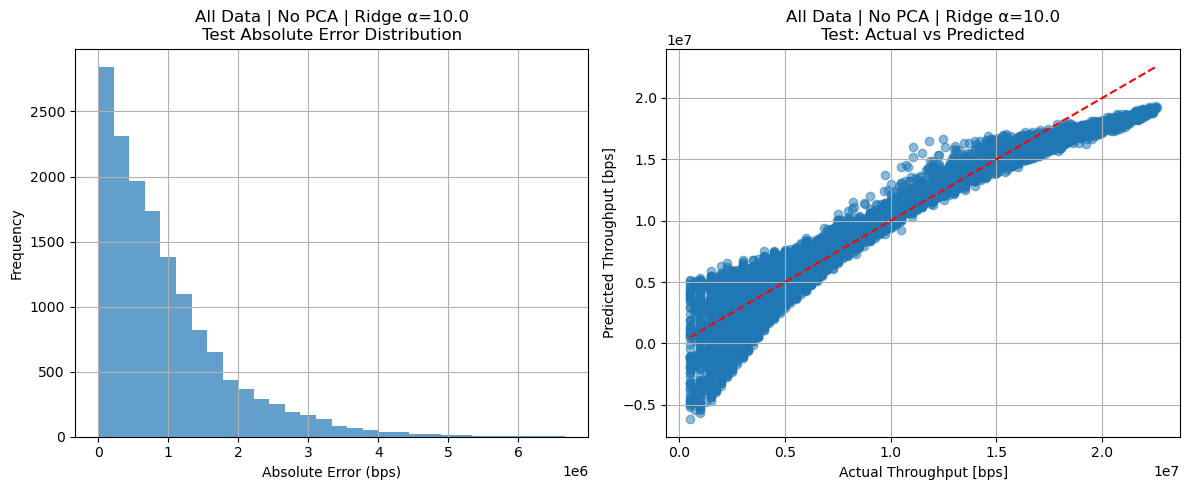


📊 Best Model Evaluation:
   🔹 CV R²: 0.9312
   🔹 Test R²: 0.9307
   🔹 Test MAE: 956157.82
   🔹 Test MSE: 1708383191232.11


In [8]:
# ------------------------------------------------
# 🏆 Best Model
# ------------------------------------------------
best = results_df.iloc[0]
print(f"\n🏆 Best Model: {best['Label']}")
print(f"   🔹 Test R²: {best['Test R2']:.4f}")
print(f"   🔹 Test MAE: {best['Test MAE']:.2f}")
print(f"   🔹 Cross-val R²: {best['CV R2']:.4f}")
print(f"   🔹 Runtime: {best['Time (s)']:.2f} seconds")

# ------------------------------------------------
# 📉 Accuracy and Loss Summary Plot for Best Model
# ------------------------------------------------
import matplotlib.pyplot as plt

best_label = best["Label"]
y_true = best["Y_test"]
y_pred = best["Y_test_pred"]
errors = np.abs(y_true - y_pred)

# Accuracy (R² over CV) already known:
cv_r2 = best["CV R2"]
test_r2 = best["Test R2"]
test_mae = best["Test MAE"]
test_mse = best["Test MSE"]

plt.figure(figsize=(12, 5))

# 1. Loss = Absolute Error Distribution
plt.subplot(1, 2, 1)
plt.hist(errors, bins=30, alpha=0.7)
plt.title(f"{best_label}\nTest Absolute Error Distribution")
plt.xlabel("Absolute Error (bps)")
plt.ylabel("Frequency")
plt.grid(True)

# 2. Accuracy = True vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title(f"{best_label}\nTest: Actual vs Predicted")
plt.xlabel("Actual Throughput [bps]")
plt.ylabel("Predicted Throughput [bps]")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print numerical summary
print(f"\n📊 Best Model Evaluation:")
print(f"   🔹 CV R²: {cv_r2:.4f}")
print(f"   🔹 Test R²: {test_r2:.4f}")
print(f"   🔹 Test MAE: {test_mae:.2f}")
print(f"   🔹 Test MSE: {test_mse:.2f}")


## 🔍 Grouped Model Comparison by Dataset and PCA Usage

This section helps analyze model performance across different **dataset variants** and **dimensionality reduction choices** (PCA or not).

---

### 🧩 Step-by-Step:

1. **Label Parsing**:
   - Splits the `Label` column into three separate columns: `Dataset`, `PCA`, and `Model`.
   - Makes it easier to group and filter results based on dataset type and PCA usage.

2. **Group Key Extraction**:
   - Identifies all unique combinations of dataset and PCA status to iterate over.

3. **Top-5 Model Display per Group**:
   - For each unique group (e.g., "All Data | PCA", "IQR Filtered | No PCA"):
     - Filters the results to include only matching rows.
     - Sorts them by test R² score in descending order.
     - Displays the **top 5 performing models** for each group, showing:
       - Model label
       - Test R²
       - Test MAE
       - Cross-validated R²
       - Runtime

---

This grouped comparison is useful for determining:
- Whether PCA improves model performance
- How robust each model is across different levels of data filtering


In [9]:
# Split Label into parts for easier grouping
results_df[["Dataset", "PCA", "Model"]] = results_df["Label"].str.split(" \| ", expand=True)

# Unique combinations of Dataset + PCA
group_keys = results_df[["Dataset", "PCA"]].drop_duplicates()

# Display top 5 models for each group
for _, row in group_keys.iterrows():
    dataset = row["Dataset"]
    pca_status = row["PCA"]

    print(f"\n🔍 Top 5 models for: 📂 {dataset} | 🧠 PCA: {pca_status}")
    filtered = results_df[
        (results_df["Dataset"] == dataset) &
        (results_df["PCA"] == pca_status)
    ].sort_values(by="Test R2", ascending=False).head(5)

    display(filtered[["Label", "Test R2", "Test MAE", "CV R2", "Time (s)"]])



🔍 Top 5 models for: 📂 All Data | 🧠 PCA: No PCA


,Label,Test R2,Test MAE,CV R2,Time (s)
3,All Data | No PCA | Ridge α=10.0,0.930739,956157.823110,0.931217,0.544053
0,All Data | No PCA | Linear,0.930736,956275.834939,0.931201,2.926508
2,All Data | No PCA | Ridge α=1.0,0.930736,955918.841204,0.931217,0.512817
1,All Data | No PCA | Ridge α=0.1,0.930736,955895.102072,0.931217,0.627361
8,"All Data | No PCA | ElasticNet α=0.1, l1=0.9",0.929376,988799.387671,0.929544,24.107191



🔍 Top 5 models for: 📂 In-Bound Only | 🧠 PCA: No PCA


,Label,Test R2,Test MAE,CV R2,Time (s)
38,In-Bound Only | No PCA | Linear,0.930643,963307.072068,0.930469,2.462030
39,In-Bound Only | No PCA | Ridge α=0.1,0.930632,961908.207547,0.930481,0.679935
40,In-Bound Only | No PCA | Ridge α=1.0,0.930632,961939.698651,0.930481,0.522611
41,In-Bound Only | No PCA | Ridge α=10.0,0.930631,962257.850547,0.930481,0.503611
46,"In-Bound Only | No PCA | ElasticNet α=0.1, l1=0.9",0.929011,996974.433184,0.928830,15.195837



🔍 Top 5 models for: 📂 IQR Filtered | 🧠 PCA: No PCA


,Label,Test R2,Test MAE,CV R2,Time (s)
76,IQR Filtered | No PCA | Linear,0.930643,963307.072068,0.930469,2.268323
77,IQR Filtered | No PCA | Ridge α=0.1,0.930632,961908.207547,0.930481,0.691131
78,IQR Filtered | No PCA | Ridge α=1.0,0.930632,961939.698651,0.930481,0.614226
79,IQR Filtered | No PCA | Ridge α=10.0,0.930631,962257.850547,0.930481,0.616056
84,"IQR Filtered | No PCA | ElasticNet α=0.1, l1=0.9",0.929011,996974.433184,0.928830,13.490589



🔍 Top 5 models for: 📂 In-Bound Only | 🧠 PCA: PCA


,Label,Test R2,Test MAE,CV R2,Time (s)
60,In-Bound Only | PCA | Ridge α=10.0,0.924786,1.021719e+06,0.924888,3.894219
59,In-Bound Only | PCA | Ridge α=1.0,0.924785,1.021443e+06,0.924889,3.938913
58,In-Bound Only | PCA | Ridge α=0.1,0.924785,1.021415e+06,0.924889,3.887724
57,In-Bound Only | PCA | Linear,0.924785,1.021412e+06,0.924889,4.003950
65,"In-Bound Only | PCA | ElasticNet α=0.1, l1=0.9",0.923467,1.051172e+06,0.923449,3.826211



🔍 Top 5 models for: 📂 IQR Filtered | 🧠 PCA: PCA


,Label,Test R2,Test MAE,CV R2,Time (s)
98,IQR Filtered | PCA | Ridge α=10.0,0.924786,1.021719e+06,0.924888,3.965382
97,IQR Filtered | PCA | Ridge α=1.0,0.924785,1.021443e+06,0.924889,3.914155
96,IQR Filtered | PCA | Ridge α=0.1,0.924785,1.021415e+06,0.924889,3.857544
95,IQR Filtered | PCA | Linear,0.924785,1.021412e+06,0.924889,3.887087
103,"IQR Filtered | PCA | ElasticNet α=0.1, l1=0.9",0.923467,1.051172e+06,0.923449,3.948149



🔍 Top 5 models for: 📂 All Data | 🧠 PCA: PCA


,Label,Test R2,Test MAE,CV R2,Time (s)
22,All Data | PCA | Ridge α=10.0,0.917427,1.101296e+06,0.916985,3.968642
21,All Data | PCA | Ridge α=1.0,0.917425,1.101146e+06,0.916985,4.004634
20,All Data | PCA | Ridge α=0.1,0.917425,1.101131e+06,0.916985,4.020086
19,All Data | PCA | Linear,0.917425,1.101129e+06,0.916985,4.139109
27,"All Data | PCA | ElasticNet α=0.1, l1=0.9",0.916262,1.121401e+06,0.915590,4.091663


## ✅ Conclusions

Based on the experimental evaluation across different data subsets, preprocessing strategies, and model configurations, the following conclusions can be drawn:

### 🥇 Best Overall Performance
- **Best model:** `All Data | No PCA | Ridge α=10.0`
- **Performance metrics:**
  - Test R²: **0.9307**
  - Test MAE: **956,157.82 bps**
  - Cross-validation R²: **0.9312**
  - Runtime: **0.54 seconds**
- This model achieved both high predictive accuracy and fast execution, slightly outperforming the baseline linear model and lower-regularized Ridge variants.

---

### 🔍 Effect of Data Filtering
- **In-Bound Only** and **IQR Filtered** datasets performed nearly identically to the unfiltered dataset, with marginal differences in R² and MAE.
- This suggests that the dataset is already quite clean and that the filtered rows have little impact on the model’s ability to generalize.

---

### 🧠 Effect of PCA
- Applying PCA led to **a consistent drop in performance** across all dataset variants:
  - Test R² dropped from ~0.9307 (No PCA) to ~0.9174 (PCA applied).
  - MAE increased by roughly **150,000 bps** on average.
- This indicates that dimensionality reduction may have discarded some useful variance or feature interactions in this context.

---

### 🧪 Model Type Insights
- **Ridge regression** slightly outperformed basic linear regression by a tiny margin, with optimal regularization at **α = 10.0**.
- **ElasticNet** with high L1 ratios (sparse regularization) consistently underperformed compared to Ridge and Linear models.
- This suggests the underlying relationship is better captured by **dense linear models**, with little benefit from feature sparsity.

---

### 💡 Final Takeaways
- **Keep all data** (no need for aggressive filtering).
- **Do not use PCA** in this scenario; raw features retain more predictive power.
- **Use Ridge regression with α=10.0** for the best trade-off between accuracy, generalization, and execution speed.
- Regularization is helpful but only moderately — the data is already well-behaved and linearly predictable.

These findings support a simple, interpretable, and effective modeling strategy for throughput prediction in Wi-Fi network simulations.
